# Exercise 5.27

In [1]:
import pathlib
# import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
import pandas as pd
from scipy import stats
from chapter_5_utils import plot_future_control_ellipse

In [2]:
def load_data() -> pd.DataFrame:
    # Five types of overtime hours for the Madison, Wisconsin, Police.
    fpth = pathlib.Path(r'..\..\data\Table5.8.xlsx')
    return pd.read_excel(fpth)

In [3]:
overtime_df = load_data()[['Holdover Hours', 'COA Hours']]
overtime_df.head(3)

,Holdover Hours,COA Hours
0,1181,14861
1,3532,11367
2,2502,13329


In [4]:
n, p = overtime_df.shape
alpha = 0.05
X = overtime_df.to_numpy()

First, make sure our process is stable.

Compute $T^{2} = \frac{n}{n + 1} {\left(\textbf{x} - \bar{\textbf{x}}\right)}^{\prime} \textbf{S}^{-1} {\left(\textbf{x} - \bar{\textbf{x}}\right)}$

In [5]:
xbar = np.mean(X, axis=0).reshape(p, 1)
S = np.cov(X, rowvar=False)

In [6]:
Sinv = la.inv(S)
stat_dist = lambda x: (n/(n + 1)) * (x.reshape(p,1)-xbar).T @ Sinv @ (x.reshape(p,1)-xbar)
dist = np.array([stat_dist(X[i,:]).flatten() for i in range(X.shape[0])])

How many values are larger than $\frac{(n-1)p}{(n-p)} F_{p=2, n-p = 13}\left(0.05\right)$?

In [7]:
f_crit = (((n-1)*p)/(n-p))*stats.f(dfn=p, dfd=n-p).ppf(q=1-alpha)
f_crit

8.011911069515861

In [8]:
print(f'There are {(dist > f_crit).sum()} observations larger than {f_crit:.2f}.')

There are 0 observations larger than 8.01.


All observations are within the bounds, so the process is stable. No observations need to be deleted.

Half-lengths in the ellipse are computed as: $\sqrt{\lambda_{i}}\sqrt{\frac{(n+1)(n-1)p}{n(n-p)}F_{p, n-p}(\alpha)}$

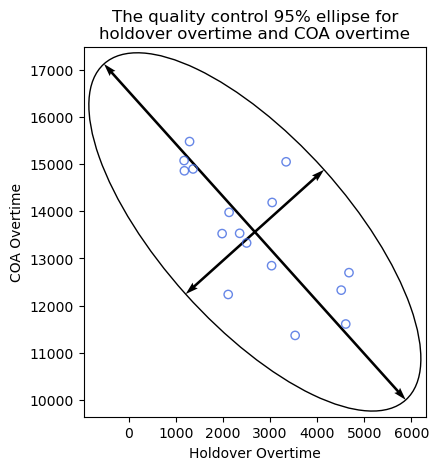

In [9]:
a_plt, a_ax = plot_future_control_ellipse(X, n, p, alpha)
a_plt.scatter(X[:,0],
              X[:,1],
              facecolors='none', edgecolors='royalblue', alpha=0.8)
a_ax.set_aspect('equal')
a_ax.set_title('The quality control 95% ellipse for\nholdover overtime and COA overtime')
a_plt.xlabel('Holdover Overtime')
a_plt.ylabel('COA Overtime')
a_plt.savefig('Question-5-27-Future-Ellipse.png')
a_plt.show()